<a href="https://colab.research.google.com/github/skmahin661/AI_guessing_Game/blob/main/XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cleaned_dataset_no_duplicates_no_missing.csv to cleaned_dataset_no_duplicates_no_missing (1).csv
Columns in dataset: ['id', 'Sex(M/F)', 'Age(year)', 'Height(cm)', 'Weight(kg)', 'Diastolic Blood Pressure(mmHg)', 'Heart Rate(b/m)', 'BMI(kg/m^2)', 'Hypertension', 'DatasetType']
   id Sex(M/F)  Age(year)  Height(cm) Weight(kg)  \
0   2   Female        -45       152.0         63   
1   6   Female         47       150.0     JJJJJJ   
2   8     Male         45       172.0         65   
3   9   Female         46       155.0         65   
4  10   Female         48       160.0         68   

   Diastolic Blood Pressure(mmHg)  Heart Rate(b/m)  BMI(kg/m^2)  \
0                              89               97        27.27   
1                              71               79        20.89   
2                              93               87        21.97   
3                              73               73        27.06   
4                              62               70        26.56   

 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:27:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Train Accuracy: 100.00%
Test Accuracy: 52.63%

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.56      0.62      0.59        16
           2       0.43      0.30      0.35        10
           3       0.50      0.25      0.33         4

    accuracy                           0.53        38
   macro avg       0.51      0.48      0.48        38
weighted avg       0.51      0.53      0.51        38



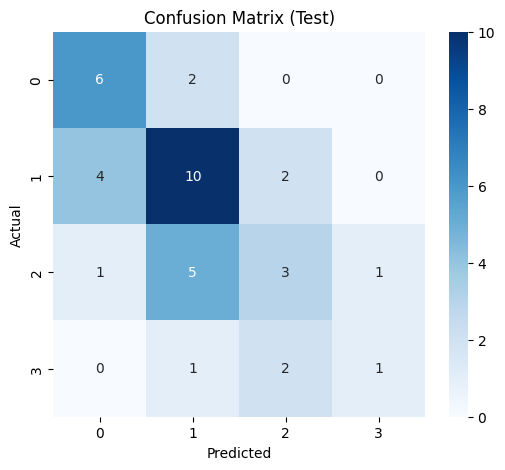

<ipython-input-2-e89a9228eb82>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train Accuracy', 'Test Accuracy'], y=[train_acc, test_acc], palette='pastel')


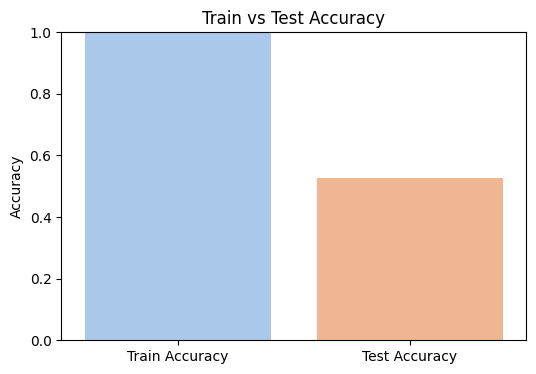

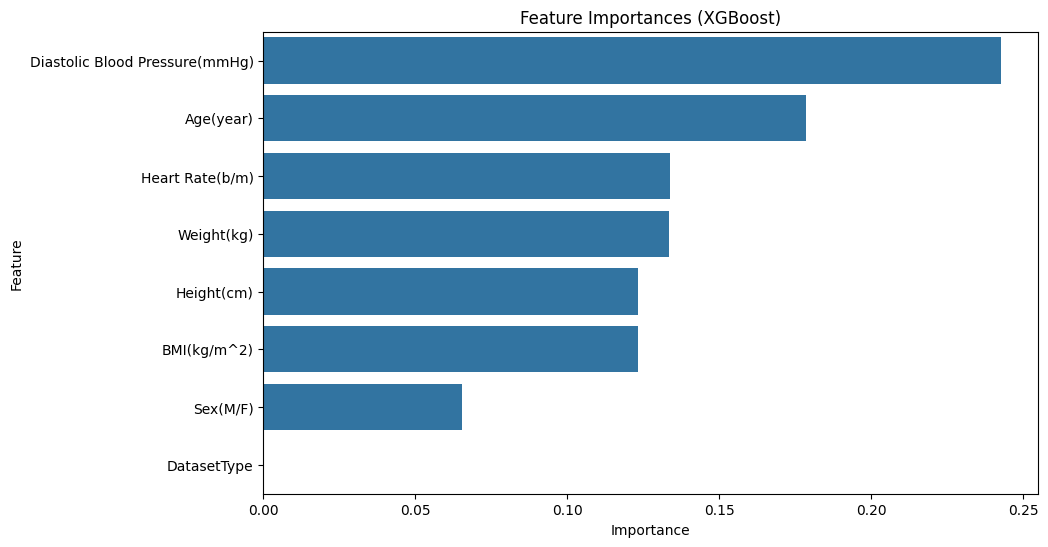

In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from google.colab import files
import xgboost as xgb

# Step 2: Upload CSV
uploaded = files.upload()

# Step 3: Load CSV and check columns
filename = next(iter(uploaded))
df = pd.read_csv(filename)

print("Columns in dataset:", df.columns.tolist())
print(df.head())

# Step 4: Define target column and drop unnecessary columns
target_column = 'Hypertension'
df = df.drop(['id'], axis=1)

# Step 5: Handle missing data
df = df.dropna()

# Step 6: Encode categorical features (except target)
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    if col != target_column:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# **Encode the target column**
target_le = LabelEncoder()
df[target_column] = target_le.fit_transform(df[target_column])
print("Target classes mapping:", dict(zip(target_le.classes_, target_le.transform(target_le.classes_))))

# Step 7: Split features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Step 8: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 9: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 10: Train XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Step 11: Predict on train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 12: Calculate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Step 13: Classification report & confusion matrix
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 14: Plot Train vs Test accuracy
plt.figure(figsize=(6,4))
sns.barplot(x=['Train Accuracy', 'Test Accuracy'], y=[train_acc, test_acc], palette='pastel')
plt.ylim(0, 1)
plt.title('Train vs Test Accuracy')
plt.ylabel('Accuracy')
plt.show()

# Step 15: Feature importance plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
